# Flower image classification

### Overview
Our aim is to create a model which predicts the type of flower based on the image given. 

Source: https://www.kaggle.com/alxmamaev/flowers-recognition

##### Steps:
1. Setting data directories 
2. Creating training and test sets
3. Flower visualisation
3. Image preprocessing
4. Creating CNN model
5. Fitting data to CNN model
6. Evaluation
7. Predicting on a single image 

In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.image import imread
import cv2
import random
import keras
from keras.utils import np_utils
import tensorflow

Using TensorFlow backend.


### 1. Setting directories

In [2]:
my_data_dir = 'C:\\Users\\hewtu\\Desktop\\Projects\\completed\\CNN (Flower images)\\images'
os.listdir(my_data_dir) 

['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']

In [3]:
daisy_path = my_data_dir + '\\daisy'
dandelion_path = my_data_dir + '\\dandelion'
rose_path = my_data_dir + '\\rose'
sunflower_path = my_data_dir + '\\sunflower'
tulip_path = my_data_dir + '\\tulip'

In [4]:
print('Number of daisy images     :', len(os.listdir(daisy_path)))
print('Number of dandelion images :', len(os.listdir(dandelion_path)))
print('Number of rose images      :', len(os.listdir(rose_path)))
print('Number of sunflower images :', len(os.listdir(sunflower_path)))
print('Number of tulip images     :', len(os.listdir(tulip_path)))

Number of daisy images     : 769
Number of dandelion images : 1052
Number of rose images      : 784
Number of sunflower images : 734
Number of tulip images     : 984


### 2. Creating training and test sets

In [5]:
daisy_train = [daisy_path + '\\' + i for i in os.listdir(daisy_path)]

dandelion_train = [dandelion_path + '\\' + i for i in os.listdir(dandelion_path)]

rose_train = [rose_path + '\\' + i for i in os.listdir(rose_path)]

sunflower_train = [sunflower_path + '\\' + i for i in os.listdir(sunflower_path)]

tulip_train = [tulip_path + '\\' + i for i in os.listdir(tulip_path)]

In [6]:
train_img = daisy_train[:551] + dandelion_train[:551] + rose_train[:551] + sunflower_train[:551] + tulip_train[:551] 

test_img = daisy_train[551:] + dandelion_train[551:] + rose_train[551:] + sunflower_train[551:] + tulip_train[551:] 

In [7]:
random.shuffle(train_img)
random.shuffle(test_img)

In [8]:
len(train_img)

2755

In [9]:
len(test_img)

1568

### 3. Flower visualisation

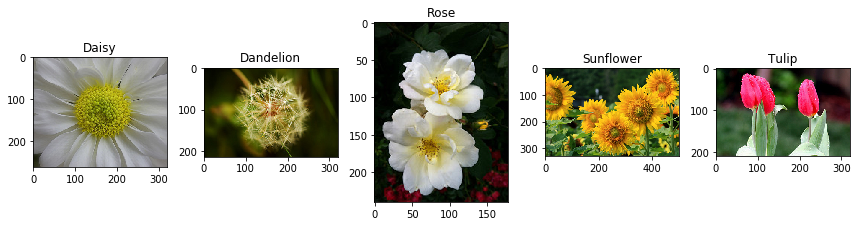

In [10]:
plt.figure(figsize=(12,12))

plt.subplot(1,5,1)
daisy_img = plt.imread(daisy_train[0])
plt.imshow(daisy_img)
plt.title('Daisy')

plt.subplot(1,5,2)
dandelion_img = plt.imread(dandelion_train[0])
plt.imshow(dandelion_img)
plt.title('Dandelion')

plt.subplot(1,5,3)
rose_img = plt.imread(rose_train[0])
plt.imshow(rose_img)
plt.title('Rose')

plt.subplot(1,5,4)
sunflower_img = plt.imread(sunflower_train[0])
plt.imshow(sunflower_img)
plt.title('Sunflower')

plt.subplot(1,5,5)
tulip_img = plt.imread(tulip_train[0])
plt.imshow(tulip_img)
plt.title('Tulip')


plt.tight_layout()

### 4. Image & data preprocessing

In [11]:
nrows = 150
ncols = 150
channels = 3

As seen by the flower images above, all the images have different sizes. 
This function will resize the input images and append them to X, then append its corresponding labels to y.

In [12]:
def processing_images(list_of_images):
    X = []
    y = []
    
    for image in list_of_images: 
        X.append(cv2.resize(cv2.imread(image, cv2.IMREAD_COLOR),(nrows,ncols), interpolation = cv2.INTER_CUBIC))
        
        if 'daisy' in image:
            y.append(1)
            
        if 'dandelion' in image:
            y.append(2)
        
        if 'rose' in image:
            y.append(3)
        
        if 'sunflower' in image:
            y.append(4)
        
        if 'tulip' in image:
            y.append(5)
    
    return(X,y)


In [13]:
# Training data
X,y= processing_images(train_img)

In [14]:
# Testing data
X_test,y_test= processing_images(test_img)

Initially, I received this error code:

OpenCV(4.2.0) C:\projects\opencv-python\opencv\modules\imgproc\src\resize.cpp:4045: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'

Upon inspection, I realised that there are non image files inside the dandelion folder. After removing them, the error was resolved.

In [15]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

def label_encoder(y):
    encoder = LabelEncoder()
    encoded_y = encoder.fit_transform(y)
    dummy_y = np_utils.to_categorical(encoded_y)
    
    return dummy_y

In [16]:
# Encoding training data
y = label_encoder(y)

# Encoding test data
y_test = label_encoder(y_test)

In [17]:
# Converting image data to numpy aray 
X = np.array(X)
X_test = np.array(X_test)

In [18]:
X.shape

(2755, 150, 150, 3)

We have 2755 images, of dimesions 150 by 150, with 3 colour channels.

In [19]:
y.shape

(2755, 5)

We have 2755 rows which represents 2755 images, and 5 columns which represent the 5 one hot encoded labels for each image.

In [20]:
X_test.shape

(1568, 150, 150, 3)

In [21]:
y_test.shape

(1568, 5)

### 5. Creating CNN model

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
# Creating validation data from training set
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPooling2D

Our aim is to create a model which predicts the type of flower based on the image given.

Since we have 5 categories of flowers, our final output layer must have 5 units. Also, the activation function must be softmax.

When we compile the model, categorical_crossentropy must be the loss function since we are doing a categorical classification.

In [25]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3),input_shape=(150,150,3), padding = 'valid', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=(150,150,3), padding = 'valid', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=128, kernel_size=(3,3),input_shape=(150,150,3), padding = 'valid', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(units = 128,activation = 'relu'))
model.add(Dense(units = 64,activation = 'relu'))
model.add(Dense(units = 5,activation = 'softmax'))    # Final output layer with 5 units

model.compile(loss='categorical_crossentropy',        # Compiling the model
              optimizer='adam',
              metrics=['accuracy'])

In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
flatten (Flatten)            (None, 36992)             0

In [27]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Image augmentaton  
train_datagen = ImageDataGenerator(rescale = 1/255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   rotation_range = 20,
                                   width_shift_range= 0.2,
                                   height_shift_range=0.2,
                                   horizontal_flip = True)
# Rescaling validation images 
val_datagen = ImageDataGenerator(rescale = 1/255)

In [28]:
# Creating batches of augmented data 
train_generator = train_datagen.flow(X_train,y_train,batch_size = 32)
val_generator = val_datagen.flow(X_val,y_val,batch_size = 32)

### 6. Fitting data to the model


In [29]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss',patience=2)

# We use fit_generator() instead of fit() because we applied data augmentation
results = model.fit_generator(train_generator,epochs=50,
                             validation_data = val_generator,
                              callbacks=[early_stop],
                              verbose = 1)

Epoch 1/50
69/69 [==============================] - 105s 2s/step - loss: 1.4296 - accuracy: 0.3698 - val_loss: 1.2525 - val_accuracy: 0.4592
Epoch 2/50
69/69 [==============================] - 105s 2s/step - loss: 1.1644 - accuracy: 0.5073 - val_loss: 1.0815 - val_accuracy: 0.5045
Epoch 3/50
69/69 [==============================] - 103s 1s/step - loss: 1.0472 - accuracy: 0.5785 - val_loss: 0.9227 - val_accuracy: 0.6352
Epoch 4/50
69/69 [==============================] - 106s 2s/step - loss: 0.9609 - accuracy: 0.6175 - val_loss: 0.8876 - val_accuracy: 0.6697
Epoch 5/50
69/69 [==============================] - 117s 2s/step - loss: 0.9239 - accuracy: 0.6248 - val_loss: 0.9041 - val_accuracy: 0.6515
Epoch 6/50
69/69 [==============================] - 105s 2s/step - loss: 0.9004 - accuracy: 0.6529 - val_loss: 0.8242 - val_accuracy: 0.6679
Epoch 7/50
69/69 [==============================] - 100s 1s/step - loss: 0.8625 - accuracy: 0.6715 - val_loss: 0.8223 - val_accuracy: 0.6933
Epoch 8/50
69

In [53]:
# Saving the model
model.save('flower_classification_model')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: flower_classification_model\assets


In [31]:
losses = pd.DataFrame(model.history.history)

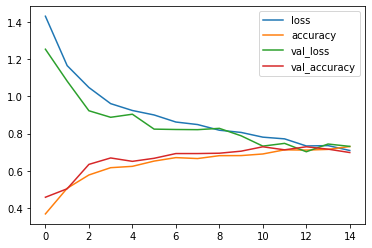

In [32]:
losses.plot()

### 7. Evaluation

In [29]:
# Loading saved model
from tensorflow.keras.models import load_model
flower_classification_model = load_model('flower_classification_model')

In [30]:
X_test = X_test/255

In [31]:
# Contains all the predicted classes of test images 
y_pred = flower_classification_model.predict_classes(X_test)

In [32]:
y_pred

array([3, 0, 2, ..., 3, 1, 2], dtype=int64)

In [33]:
# Contains all the actual classes of test images
y_test = np.argmax(y_test,axis=1)

In [34]:
y_test

array([3, 4, 4, ..., 3, 1, 2], dtype=int64)

In [35]:
from sklearn import metrics

In [36]:
print(metrics.classification_report(y_test,y_pred))
print(metrics.confusion_matrix(y_test,y_pred))
print('')
print('Accuracy: ', metrics.accuracy_score(y_test,y_pred).round(2))

              precision    recall  f1-score   support

           0       0.68      0.80      0.73       218
           1       0.83      0.81      0.82       501
           2       0.50      0.71      0.58       233
           3       0.69      0.83      0.75       183
           4       0.82      0.51      0.63       433

    accuracy                           0.71      1568
   macro avg       0.70      0.73      0.70      1568
weighted avg       0.74      0.71      0.71      1568

[[175  20   9   7   7]
 [ 37 407  13  37   7]
 [ 21  15 165   4  28]
 [  7  14   5 152   5]
 [ 19  32 140  21 221]]

Accuracy:  0.71


### 8. Predicting on a single image

In [37]:
from random import randint

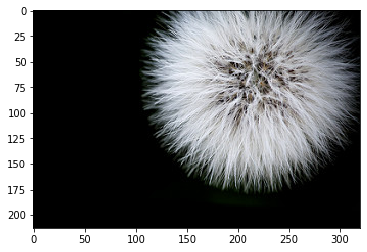

In [38]:
random_img = plt.imread(test_img[randint(0,len(test_img))])
plt.imshow(random_img)

In [39]:
def process(img):
    my_img = cv2.resize(img,(nrows,ncols), interpolation = cv2.INTER_CUBIC)  # Reshape to (150,150,3)
    my_img = np.expand_dims(my_img, axis=0)                                  # Reshape to (1,150,150,3)
    my_img = my_img/255                                                      # Rescaling
    labels = ['Daisy', 'Dandelion', 'Rose', 'Sunflower', 'Tulip']
    print(labels[int(flower_classification_model.predict_classes(my_img))])

In [40]:
process(random_img)

Dandelion
